In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data
df = pd.read_csv('../data/case_control_translation_split.csv', )


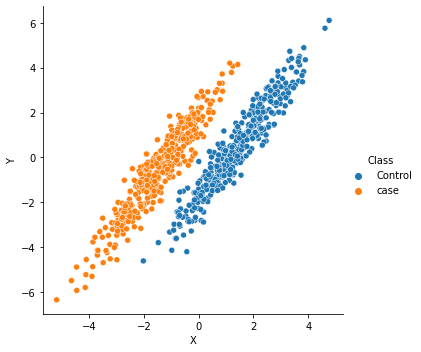

In [3]:
sns.relplot(data=df, x='X', y='Y', hue = 'Class')

In [4]:
def reduce_by_angle(angle: float, points:np.ndarray, centralize: bool = False):
    """
    Only accepts points of shape (num_samples, 2)
    """
    assert points.shape[1] == 2, f"Function accepts points of shape (num_samples,2), get shape {points.shape}"

    if centralize:
        points = points-np.mean(points,axis = 0, keepdims = True)

    c,s = np.cos(angle), np.sin(angle)
    z = np.array([[c],
                  [s]])
    return points@z

def get_line_from_angle(angle: float, factor: float=100):
    c,s = np.cos(angle), np.sin(angle)
    xlim = factor * np.array([c,-c])
    ylim = factor * np.array([s,-s])
    return xlim, ylim


In [5]:
angle = np.pi/4
df['Z'] = reduce_by_angle(angle, df[['X','Y']].to_numpy(), centralize= True)
xlim, ylim = get_line_from_angle(angle)

Text(0.5, 1.0, 'Projection onto line with angle 45')

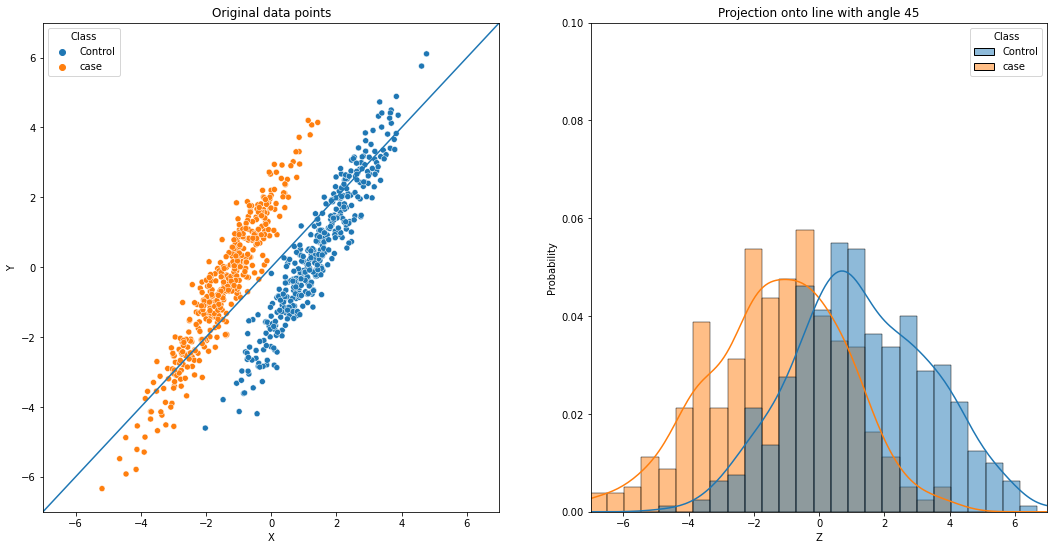

In [6]:

fig, axs = plt.subplots(1,2)
sns.scatterplot(data = df, x ='X', y = 'Y', hue = 'Class', ax = axs[0])
sns.histplot(data = df, x = 'Z', hue = 'Class',bins = 30,kde = True,stat = 'probability', ax = axs[1])
axs[0].plot(xlim, ylim)
fig.set_size_inches(18,9)
axs[0].set_xlim([-7,7])
axs[0].set_ylim([-7,7])
axs[0].set_title("Original data points")
axs[1].set_xlim([-7,7])
axs[1].set_ylim([0,0.1])
axs[1].set_title(f"Projection onto line with angle {int(angle/(2*np.pi)*360)}")

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
temp_file = "temp.png"
with imageio.get_writer('plot.gif', mode='I') as writer:

    for angle in np.linspace(0,np.pi, 180):
        df['Z'] = reduce_by_angle(angle, df[['X','Y']].to_numpy(), centralize= True)
        xlim, ylim = get_line_from_angle(angle)
        fig, axs = plt.subplots(1,2)
        sns.scatterplot(data = df, x ='X', y = 'Y', hue = 'Class', ax = axs[0])
        sns.histplot(data = df, x = 'Z', hue = 'Class',bins = 30,kde = True,stat = 'probability', ax = axs[1])
        axs[0].plot(xlim, ylim)
        fig.set_size_inches(18,9)
        axs[0].set_xlim([-7,7])
        axs[0].set_ylim([-7,7])
        axs[0].set_title("Original data points")
        axs[1].set_xlim([-7,7])
        axs[1].set_ylim([0,0.1])
        axs[1].set_title(f"Projection onto line with angle {int(angle/(2*np.pi)*360)}")
        fig.savefig(temp_file)
        writer.append_data( imageio.imread(temp_file))
        plt.close(fig)

# How well does PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=1)
df['PCA_1'] = pca.fit_transform(df[['X','Y']].to_numpy())

In [14]:
v = pca.components_
v

array([[-0.67274362, -0.73987568]])

Text(0.5, 1.0, 'Projection onto line with angle 45')

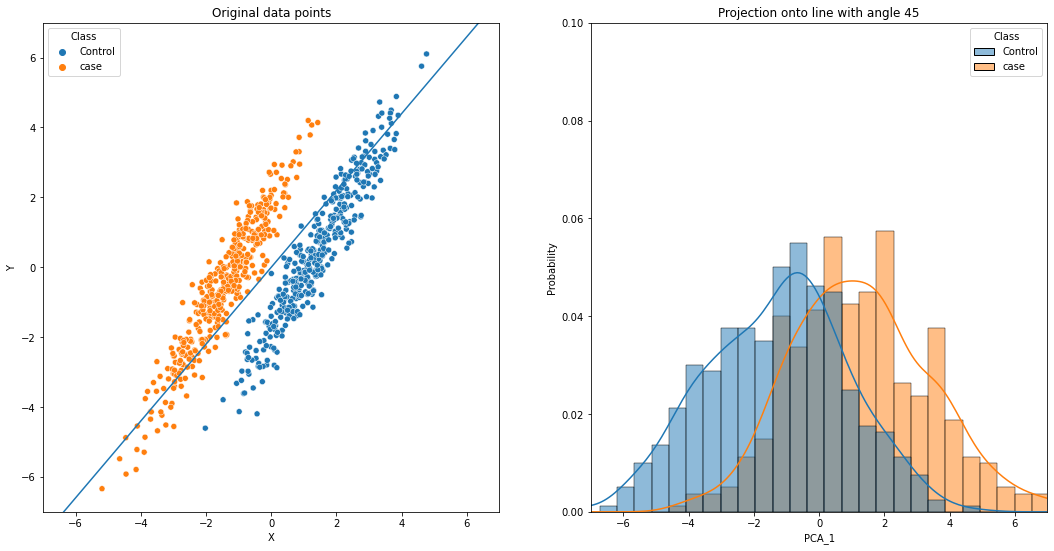

In [13]:
fig, axs = plt.subplots(1,2)
sns.scatterplot(data = df, x ='X', y = 'Y', hue = 'Class', ax = axs[0])
sns.histplot(data = df, x = 'PCA_1', hue = 'Class',bins = 30,kde = True,stat = 'probability', ax = axs[1])
axs[0].plot([100*v[0,0],-100*v[0,0]], [100*v[0,1],-100*v[0,1]])
fig.set_size_inches(18,9)
axs[0].set_xlim([-7,7])
axs[0].set_ylim([-7,7])
axs[0].set_title("Original data points")
axs[1].set_xlim([-7,7])
axs[1].set_ylim([0,0.1])
axs[1].set_title(f"Projection onto line with angle {int(angle/(2*np.pi)*360)}")

In [31]:
from pcpca import PCPCA

In [82]:
pcpca = PCPCA(gamma=0.9, n_components=1)
X_reduced, Y_reduced = pcpca.fit_transform(df[df['Class'] == 'case'][['X','Y']].to_numpy().T,
                                    df[df['Class'] == 'Control'][['X','Y']].to_numpy().T)

In [92]:
df['PCPCA'] = np.hstack((2*Y_reduced, 2*X_reduced))[0]

Text(0.5, 1.0, 'Projection onto line with angle 45')

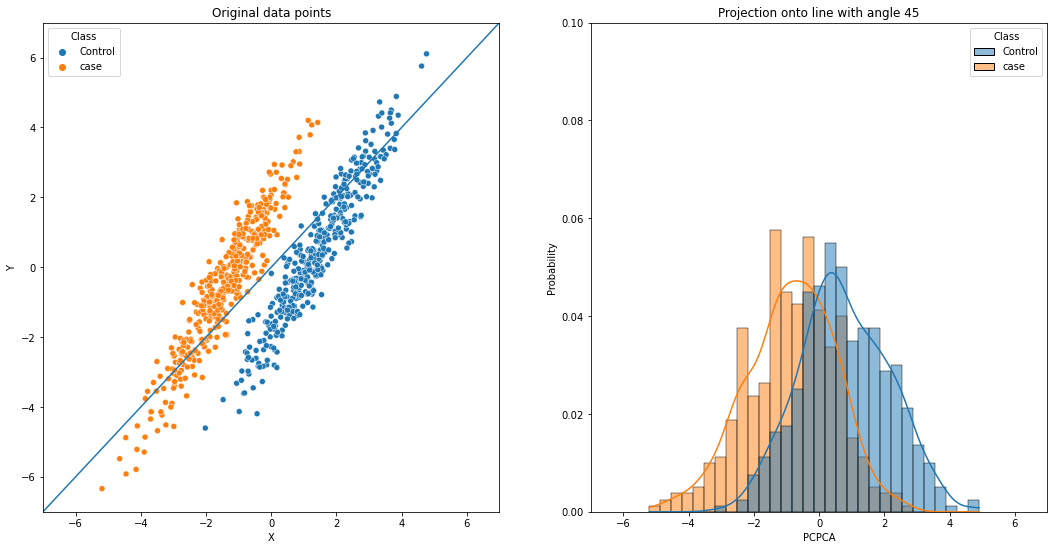

In [93]:
fig, axs = plt.subplots(1,2)
sns.scatterplot(data = df, x ='X', y = 'Y', hue = 'Class', ax = axs[0])
sns.histplot(data = df, x = 'PCPCA', hue = 'Class',bins = 30,kde = True,stat = 'probability', ax = axs[1])
axs[0].plot(xlim, ylim)
fig.set_size_inches(18,9)
axs[0].set_xlim([-7,7])
axs[0].set_ylim([-7,7])
axs[0].set_title("Original data points")
axs[1].set_xlim([-7,7])
axs[1].set_ylim([0,0.1])
axs[1].set_title(f"Projection onto line with angle {int(angle/(2*np.pi)*360)}")

In [88]:
pcpca.W_mle

array([[1.96975257],
       [2.17082709]])